# Line Plots and Stacked/Clustered Bar Plots

*Tyler Caraza-Harter* and *Meenakshi Syamkumar*

Previously, we learned how to create matplotlib pie charts, simple bar graphs, and scatter plots (by calling Pandas plotting methods for Series and DataFrames).

In this document, we'll also learn how to create line plots and more complicated bar plots (clustered and stacked).

Let's start by doing our matplotlib setup and usual imports:

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame

For readability, you may also want to increase the default font size at the start of your notebooks.  You can do so by copy/pasting the following:

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# Line Plot from a Series

We can create a line plot from either a Series (with `s.plot.line()`) or a DataFrame (with `df.plot.line()`).

In [4]:
s = Series([0,100,300,200,400])
s

0      0
1    100
2    300
3    200
4    400
dtype: int64

<AxesSubplot:>

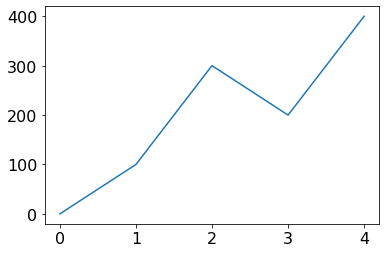

In [5]:
s.plot.line()

The y values are clearly the values in the Series, but where are the x-values coming from?  You guessed it, the Series' index.  Let's try the same values with a different index.

In [6]:
s = Series([0,100,300,200,400], index=[1,2,30,31,32])
s

1       0
2     100
30    300
31    200
32    400
dtype: int64

<AxesSubplot:>

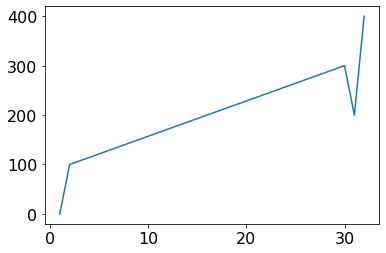

In [7]:
s.plot.line()

Now we see that the plot starts from 1 (instead of 0) and a bigger gap in the index (between 2 and 30) corresponds to a bigger line segment over the x-axis.

What happens if our index is not in order?

In [8]:
s = Series([0,100,300,200,400], index=[1,11,2,22,3])
s

1       0
11    100
2     300
22    200
3     400
dtype: int64

<AxesSubplot:>

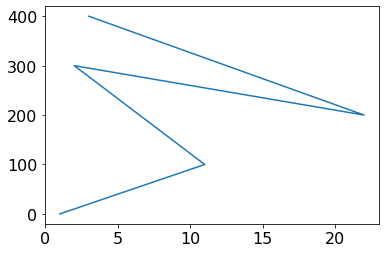

In [9]:
s.plot.line()

Oops!  That's probably not what we want.  99% of the time, people making a line plot want readers to be able to lookup a single y-value (per line) given a point along the x-axis.  So even though this line passes through all of our data points, the lines between the points are very misleading.

If your data isn't already sorted, you'll probably want to sort it by the index first:

In [10]:
s.sort_index()

1       0
2     300
3     400
11    100
22    200
dtype: int64

Don't get confused about this function!  If we have a Python list `L` and we call `L.sort()`, the items in L are rearranged in place and the sort function doesn't return anything.

In contrast, if we have a Pandas Series `s` and we call `s.sort_index()`, the items in `s` are not moved, but the sort_index function returns a new Series that is sorted.  So if we print `s` again, we see the original (unsorted) data:

In [11]:
s

1       0
11    100
2     300
22    200
3     400
dtype: int64

Because sort_index() returns a new Series and we can call `.plot.line()` on a Series, we can do the following on an unsorted Series `s` in one step:

<AxesSubplot:>

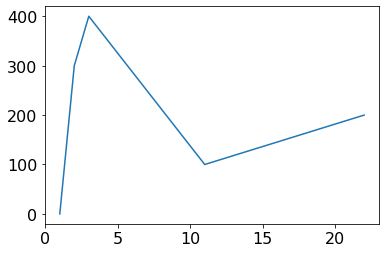

In [12]:
s.sort_index().plot.line()

# Line Plot from a DataFrame

In addition to the `Series.plot.line()` method, there is also a `DataFrame.plot.line()` method.  Whereas the line function for a Series creates a plot with a single line, the line plot for a DataFrame draws a line for each column in the DataFrame (remember that each column in a DataFrame is essentially just a Series).

Let's try with a DataFrame containing temperature patterns for Madison, WI.  The data was copied from [https://www.usclimatedata.com/climate/madison/wisconsin/united-states/uswi0411](https://www.usclimatedata.com/climate/madison/wisconsin/united-states/uswi0411), and contains the typical daily highs and lows for each month of the year.

In [13]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})

df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


<AxesSubplot:>

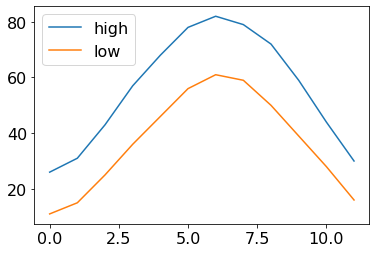

In [14]:
df.plot.line()

Not bad!  We can see the temperatures vary througout the year, with highs correlated with lows.  But what is the x-axis?  What is the y-axis?

Remember that calling an AxesSubplot object.  There are `AxesSubplot.set_xlabel` and `AxesSubplot.set_ylabel` functions that will help us out here.  Just to make sure to call them in the same cell where `.plot.line` is called, or the plot will be displayed before they can have an effect.

Text(0, 0.5, 'Temp (Fehrenheit)')

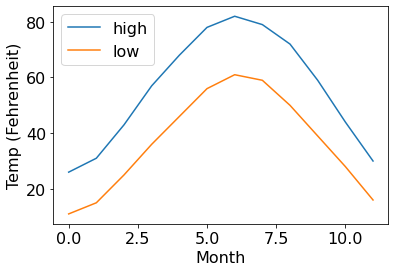

In [15]:
ax = df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')

What if we want the plot in Celcius?  That's easy enough with some element-wise operations.

In [16]:
c_df = (df - 32) * 5/9
c_df

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


Text(0, 0.5, 'Temp (Celsius)')

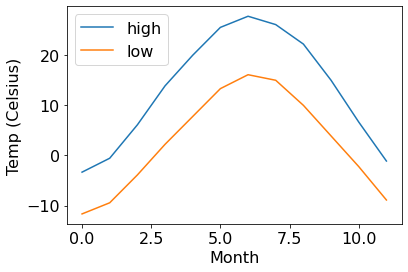

In [17]:
ax = c_df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Celsius)')

That's looking good!

One small thing: did you notice the extra print above the plot that says `Text(0,0.5,'Temp (Celsius)')`?  That happened because the call to `set_ylabel` returned that value.  We could always put `None` at the end of our cell to supress that:

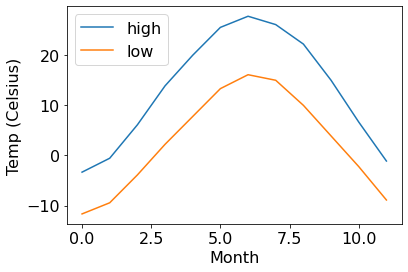

In [18]:
ax = c_df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Celsius)')
None

## Tick Labels

The above plot would be nicer if we saw actual month names along the y-axis.  Let's create a DataFrame with the same data, but month names for the index.

In [19]:
df = DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})

df = df.set_index("month")

df.head()

,high,low
month,,
Jan,26,11
Feb,31,15
Mar,43,25
Apr,57,36
May,68,46


Let's try plotting it.

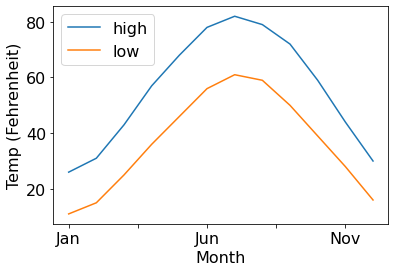

In [20]:
ax = df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

Unfortunately, even though we now have months for the index, matplotlib won't use all the index values for the x-axis unless we specifically tell it to.  We can explicitly give matplotlib tick labels with the `set_xticklabels` method. `set_xticklabels` enables us to set the labels, but not the tick positions.  Let's take a look at the positions:

In [21]:
ax.get_xticks()

array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5])

You should read the above as follows:
* the 1st tick label (Jan) is drawn at position 0. (the leftmost)
* the 6th tick label (Feb) is drawn at position 5. (center)
* the 11th tick label (Mar) is drawn at position 10. (the rightmost)

Fortunately, we can set all the tick positions explicitly.  The only correct configuration in this case is 0, 1, 2, 3, ...
In order to use `set_xticklabels`, we need to first use `set_xticks`. Here is the updated code:

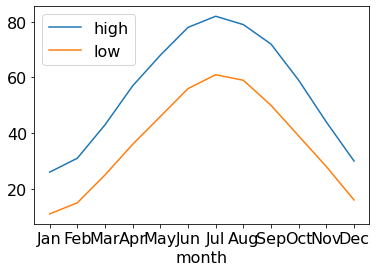

In [22]:
ax = df.plot.line()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(df.index)
None

If we want to count from 0 to 11, we can use `range(len(df.index))`.

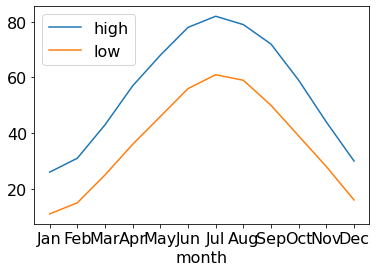

In [23]:
ax = df.plot.line()
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index)
None

This plot is correct, but crowded!  There are two solutions: (1) make the plot wider or (2) rotate the labels.  We'll demo both.  We'll also add back the axis labels.

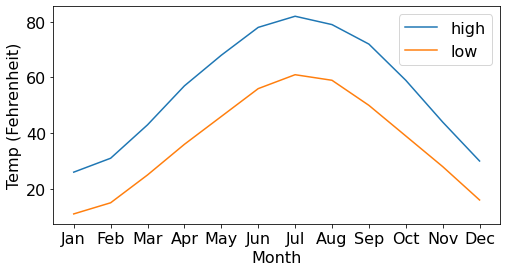

In [24]:
# approach 1: wider plot
ax = df.plot.line(figsize=(8,4)) # this is the (width,height)
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index)
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

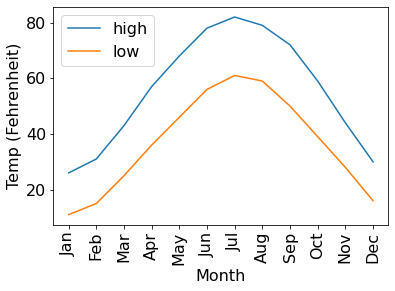

In [25]:
# approach 2: rotate ticks
ax = df.plot.line()
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90) # 90 is in degrees
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

# Example: Stock Market Returns

In this example, we'll plot the performance of American stocks from 1970 to 2017.  Specifically, we'll be looking at S&P 500 index data.  The S&P 500 index tracks how well the 500 largest public American companies are collectively worth (think of it as a weighted average with more valuable companies being weighted more heavily).

We'll get our data from the Wikipedia on the [S&P 500 Index](https://en.wikipedia.org/wiki/S%26P_500_Index) article.  Take a moment to skip the article.

We're interested in the "Total Annual Return Including Dividends" column of the table in the "Annual returns" section.  Investors make money when (1) stock prices rise, or (2) companies pay dividends to shareholders.  This column captures the yearly return, considering both these factors.

There are three parts in this example.  In part 1, we do some web scraping to collect the data (it's a details BeautifulSoup example).  For part 2, we'll visualise the data in several ways.  In part 3, we'll simulate stock market returns, sampling from the real data in order to explore possible investment outcomes.

## Stock Market Part 1: Collecting the Data

As a first step, let's download the wiki page and save it to a file named sp500.html.  We check if this file exists before doing the download.  If it does, we just use the contents of sp500.html instead of fetching the data again from Wikipedia (it's faster to access data on your computer rather than from a website).

In [26]:
import os, requests

path = "sp500.html"

if not os.path.exists(path):
    r = requests.get('https://en.wikipedia.org/wiki/S%26P_500_Index')
    r.raise_for_status()
    f = open(path, "w")
    f.write(r.text)
    f.close()

f = open(path)
html = f.read()
f.close()

In [27]:
# let's parse the HTML
from bs4 import BeautifulSoup
page = BeautifulSoup(html, 'html.parser')

The page contains six tables.  Which one has the data we care about?  We can loop over each table, convert the contents to text, and check with the text contains the term "Total Annual Return" (that's the name of the column with the data we want).

In [28]:
target_column = "Total Annual Return"
tab = None
for curr in page.find_all('table'):
    if curr.get_text().find(target_column) >= 0:
        tab = curr
        break
assert(tab != None)

Now we have the table we want.  Let's create a list of lists representing the table data.  This will be a list of rows, where each row contains `td` (table data) and `th` (table header) elements.  Both of these elements are used to represent cells in HTML tables.

In [29]:
rows = []
for tr in tab.find_all('tr'):
    rows.append(tr.find_all(['td', 'th']))

# let's print the first three rows to make sure they are what we expect.
rows[:3]

[[<th>Year
  </th>,
  <th>Change in Index
  </th>,
  <th>Total Annual Return Including Dividends
  </th>,
  <th>Value of $1.00 Invested on 1970‑01‑01
  </th>,
  <th>5 Year Annualized Return
  </th>,
  <th>10 Year Annualized Return
  </th>,
  <th>15 Year Annualized Return
  </th>,
  <th>20 Year Annualized Return
  </th>,
  <th>25 Year Annualized Return
  </th>],
 [<td>1970
  </td>,
  <td align="right">0.10%
  </td>,
  <td align="right">4.01%
  </td>,
  <td align="right">$1.04
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>],
 [<td>1971
  </td>,
  <td align="right">10.79%
  </td>,
  <td align="right">14.31%
  </td>,
  <td align="right">$1.19
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>,
  <td align="right">-
  </td>]]

Let's make sure (with asserts) that the 0th and 2nd columns contain year and annual return data.  If they do, we want to extract these entries and construct a Series with year as index and annual return for values.

In [30]:
assert(rows[0][0].get_text().find("Year") >= 0)
assert(rows[0][2].get_text().find("Total Annual Return") >= 0)

index = []
values = []

for row in rows[1:]:
    index.append(row[0].get_text().strip())
    values.append(row[2].get_text().strip())
    if index[-1] == '2018':
        break
    
returns = Series(values, index=index)
returns.tail()

2014    13.69%
2015     1.38%
2016    11.96%
2017    21.83%
2018    −4.43%
dtype: object

Let's normalize the data so we can use it to multiply initial money.  For example, we want to convert 4% to 1.04.  That way, if we start with \\$100, we can multiply by 1.04 to compute that we have \\$104 after a year.

Don't worry about the replace of `chr(8722)`.  It's not important to the example.

In [31]:
print("'{}' is a weird dash, not the negative dash '-' that will let us convert to a float.".format(chr(8722)))

mults = returns.str.replace(chr(8722), "-").str.replace("%", "").astype(float) / 100 + 1
mults.head()

'−' is a weird dash, not the negative dash '-' that will let us convert to a float.


1970    1.0401
1971    1.1431
1972    1.1898
1973    0.8534
1974    0.7353
dtype: float64

We'll save this nicely formatted data to a CSV file.  Any analysis of returns can use that directly without needing to repeat this HTML parsing.

In [32]:
df = DataFrame({"year":mults.index, "return":mults.values})
df.to_csv("sp500.csv", index=False)
df.tail()

,year,return
44,2014,1.1369
45,2015,1.0138
46,2016,1.1196
47,2017,1.2183
48,2018,0.9557


## Stock Market Part 2: Plotting

In the previous step, we generated sp500.csv.  Let's read that in and start doing some plotting.  There are a few things we want to plot:

* returns each year
* total returns over time
* correlation between the returns in one year and the subsequent year

In [33]:
df = pd.read_csv("sp500.csv")
df.tail()

,year,return
44,2014,1.1369
45,2015,1.0138
46,2016,1.1196
47,2017,1.2183
48,2018,0.9557


Lets use the year as the index.

In [34]:
df = df.set_index("year")
df.head()

,return
year,
1970,1.0401
1971,1.1431
1972,1.1898
1973,0.8534
1974,0.7353


**Plot 1**: returns each year.  We want the year for the x-axis and the return on the y-axis.

<AxesSubplot:xlabel='year'>

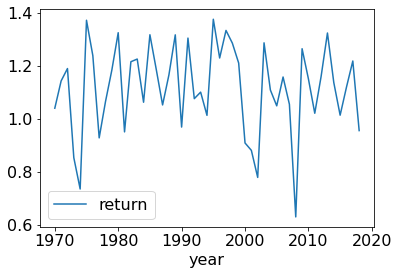

In [35]:
df.plot.line()

We see a lot of noise, but the line stays above 1 in most years.

**Plot 2**: total returns over time.  The x-axis will be time, and the y-axis will be total returns.  We will assume we started in 1970 with \$1000.

In order to get the total money in a given year, we want to multiply the starting money by all the return multiples up through that year (this is called a compounding return).  We can use the `cumprod` method for this.

In [36]:
df['return'].cumprod().head()

year
1970    1.040100
1971    1.188938
1972    1.414599
1973    1.207219
1974    0.887668
Name: return, dtype: float64

For example, the 1973 value of `1.207` came by multiplying `1.0401 * 1.1431 * 1.1898 * 0.8534` (the multiples for 1970 through 1973).  Let's plot how much money we have over time, if we start with $1000.

In [37]:
total = 1000 * df['return'].cumprod()
total.head()

year
1970    1040.100000
1971    1188.938310
1972    1414.598801
1973    1207.218617
1974     887.667849
Name: return, dtype: float64

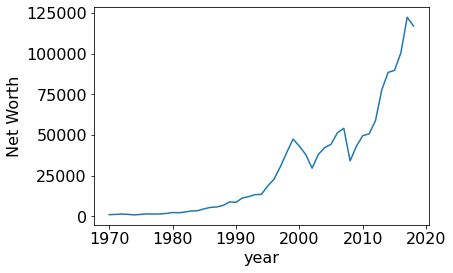

In [38]:
ax = total.plot.line()
ax.set_ylabel('Net Worth')
None

**Plot 3**: do a scatter to show the correlation between one year and the next.
    
To do this, we'll create two Series, both indexed by year.  The first Series we'll pull directly from sp500.csv: the index will be a year, and the corresponding value will be the returns for that year.  In the second Series, the index will be a year, and the value will the the returns in the year FOLLOWING the year in the index.

In [39]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [40]:
df = df.set_index("year")
df.head()

,return
year,
1970,1.0401
1971,1.1431
1972,1.1898
1973,0.8534
1974,0.7353


In [41]:
series1 = df['return']
series2 = Series(df['return'].values[1:], index=df['return'].index[:-1])
pairs = DataFrame({"curr":series1, "next":series2})
pairs.head()

,curr,next
year,,
1970,1.0401,1.1431
1971,1.1431,1.1898
1972,1.1898,0.8534
1973,0.8534,0.7353
1974,0.7353,1.3720


As you can see, the `next` column of the 1970 year contains the `curr` value of the 1971 year.  Let's do a scatter plot to look at the correlation.  As a pre-step, we'll subtract 1 from ever cell so a 10% loss will be represented as -0.1 (instead of 0.9).

In [42]:
(pairs - 1).head()

,curr,next
year,,
1970,0.0401,0.1431
1971,0.1431,0.1898
1972,0.1898,-0.1466
1973,-0.1466,-0.2647
1974,-0.2647,0.3720


<AxesSubplot:xlabel='curr', ylabel='next'>

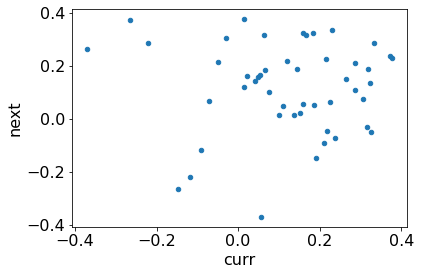

In [43]:
(pairs - 1).plot.scatter(x='curr', y='next')

## Stock Market Part 3: Simulation

In this section, we'll going explore likely outcomes if one were to invest \$1000 in an S&P 500 index fund for 10 years.

In [44]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [45]:
returns = df['return']
returns.head()

0    1.0401
1    1.1431
2    1.1898
3    0.8534
4    0.7353
Name: return, dtype: float64

In [46]:
import random
sim = DataFrame()

# do 25 simulations
for i in range(25):
    # sample returns for 10 years
    decade = random.choices(returns, k=10)

    # start with $1000, compute compounded wealth over
    # the course of the decade
    net_worth = 1000 * Series(decade).cumprod()
    
    # add this simulation as a column in the DataFrame
    sim['sim'+str(i)] = net_worth
    
sim

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,735.300000,1143.100000,1218.300000,1229.600000,1264.600000,1285.800000,1210.400000,950.800000,853.400000,1100.800000,...,1325.000000,1375.800000,928.200000,1136.900000,1325.000000,1323.900000,1372.000000,779.000000,1186.700000,1013.200000
1,870.889320,1158.874780,1567.708440,1459.166320,1315.310460,1693.270020,1172.877600,988.927080,1097.301720,1415.408640,...,1537.000000,1462.062660,986.398140,1497.183610,1728.727500,1543.799790,1170.864800,795.436900,1365.417020,1165.787920
2,1119.789488,1234.896966,1828.104812,1530.811386,1732.658469,2323.166467,1066.145738,1173.559766,1151.179234,1558.081831,...,1621.381300,1907.553153,1198.966939,1450.770918,2186.148797,1467.844840,1298.254890,875.616940,1203.068936,1417.015217
3,1376.893154,1429.887196,2212.738064,1685.117174,2006.245241,2437.233941,989.596474,1429.747863,1524.046188,2143.608983,...,1815.298503,1770.590836,1541.631690,1920.675618,2515.382805,1856.236585,1710.191167,921.586829,1165.773799,1742.361911
4,1334.209466,1600.901705,1627.026299,1632.878542,2642.826856,2571.038084,1225.516274,1737.858527,1449.063116,2756.252430,...,1929.117720,2157.110816,971.227965,2530.105992,2638.888101,1635.530055,2034.785450,1014.482781,1599.441653,2135.438758
5,1757.554130,1896.107980,1692.270053,2161.767901,3040.836581,3051.050895,1242.428398,2234.538494,1065.496109,3546.745627,...,1843.657805,2959.556039,1124.584861,3255.740391,2768.457507,1555.061976,2616.327132,964.570228,1520.749123,2298.159191
6,2314.523034,2439.911748,1444.183263,2006.552966,2764.120452,2243.437723,1307.655889,2265.375125,1261.973592,3389.624796,...,1573.377571,2867.809802,1488.837897,3298.716164,2806.662220,1673.557699,3413.522009,1069.515469,1473.605901,2410.998807
7,2631.381237,2889.831474,1710.490657,2105.074717,2678.432718,2726.898552,1335.247429,2955.634926,1731.427768,4463.796894,...,1834.715585,2447.388885,1602.287345,2078.191183,2668.574439,1428.214140,4519.161788,1302.990696,1709.382845,2796.758616
8,3007.931892,3325.040094,1882.908115,2708.810145,3282.687139,3229.738645,1405.347919,2864.010243,2294.141792,5914.530884,...,2393.753424,2694.085685,1456.479196,2287.672855,2835.894056,1583.603839,5269.794561,1543.262180,1586.649156,3009.871623
9,2859.941643,4561.955010,2195.659153,2765.966039,2413.759853,3274.309038,1094.766029,3082.247824,2729.569905,6896.934464,...,2511.286717,3099.814989,1872.740951,1441.233898,3224.127953,1661.358787,4891.423312,1134.760681,1607.592925,3073.379914


Each of the above columns in the above DataFrame represents a simulation.  The bottom row represents the total wealth after 10 years.

Let's plot each simulation.  We'll disable the legend because 25 legend entries is too many.

Text(0, 0.5, 'Net Worth ($)')

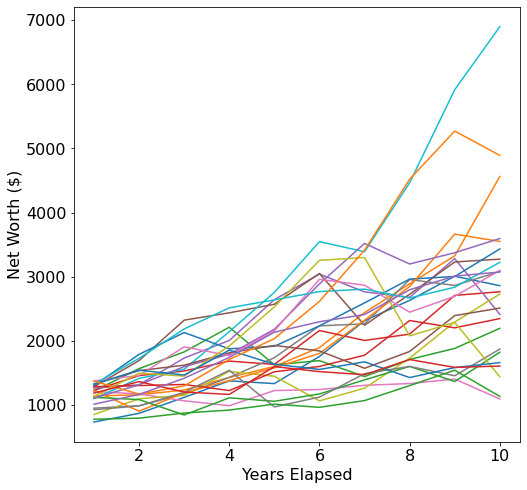

In [47]:
sim.set_index(sim.index + 1, inplace=True)
ax = sim.plot.line(legend=False, figsize=(8,8))
ax.set_xlabel("Years Elapsed")
ax.set_ylabel("Net Worth ($)")

It appears that doubling one's money (or better) over 10 years is fairly like.  Of course, in some cases wealth increases very little (or worse, decreases).  We also observe that the road to wealth is usually bumpy.

# Bar Plots

Just like a line plot, bar plots can be created from either a Pandas Series or DataFrame.  For our example data, let's learn a bit about the fire hydrants around the city of Madison.  Data describing each fire hydrant can be found at [http://data-cityofmadison.opendata.arcgis.com/datasets/54c4877f16084409849ebd5385e2ee27_6](http://data-cityofmadison.opendata.arcgis.com/datasets/54c4877f16084409849ebd5385e2ee27_6).  We have already downloaded the data to a file named "Fire_Hydrants.csv".  Let's read it and preview a few rows.

In [48]:
df = pd.read_csv('Fire_Hydrants.csv')
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


For our first example, let's see what nozzle colors are most common.  We can get a Series summarizing the data by first extracting the `nozzle_color` column, then using the `Series.value_counts()` function to produce a summary Series.

In [49]:
df['nozzle_color'].head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: nozzle_color, dtype: object

In [50]:
df['nozzle_color'].value_counts()

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
C            1
ORANGE       1
white        1
GREEN        1
Name: nozzle_color, dtype: int64

The above data means, for example, that there are 5810 "blue" nozzles and 1148 "Blue" nozzles.  We can already see there is a lot of blue, but we would really like a total count, not confused by whether the letters are upper or lower case.

In [51]:
df['nozzle_color'].str.upper().value_counts()

BLUE      7003
GREEN      330
ORANGE      79
RED          9
C            1
WHITE        1
Name: nozzle_color, dtype: int64

Great!  It's not clear what "C" means, but the data is clean enough.  Let's plot it with `Series.plot.bar`.

Text(0, 0.5, 'Hydrant Counts')

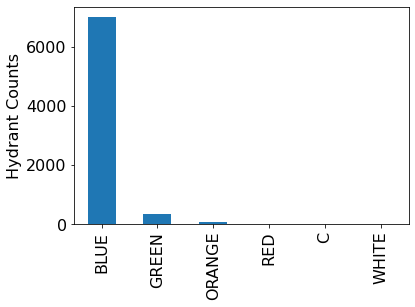

In [52]:
counts = df['nozzle_color'].str.upper().value_counts()
ax = counts.plot.bar()
ax.set_ylabel("Hydrant Counts")

Is the data reasonable?  Try to notice next time you're walking by a hydrant.  Consider it a challenge to spot a green nozzle (bonus points for orange!).

For our second question, let's create a similar plot that tells us what model of hydrants are most common.  The model is represented by the `Style` column in the table.  The following code is a copy/paste of above, just replacing "nozzle_color" with "Style":

<AxesSubplot:>

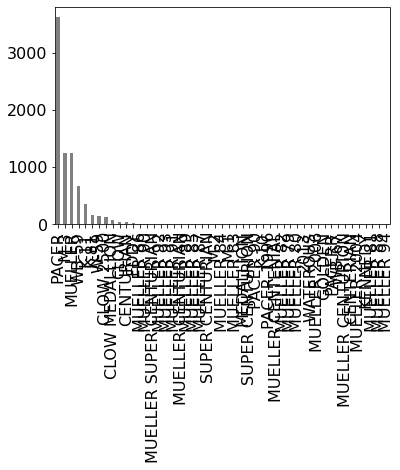

In [53]:
counts = df['Style'].str.upper().value_counts()
counts.plot.bar(color="gray")

Woah!  That's way too much data.  Let's just consider the top 10 models.

In [54]:
top10 = counts[:10]
top10

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
Name: Style, dtype: int64

How many others are not in the top 10?  We should show that in our results too.

In [55]:
others = counts[10:].sum()
top10["others"] = others
top10

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
others             229
Name: Style, dtype: int64

Now that looks like what we want to plot.

Text(0, 0.5, 'Hydrant Counts')

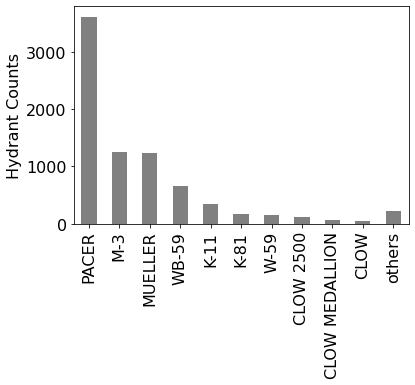

In [56]:
ax = top10.plot.bar(color="gray")
ax.set_ylabel("Hydrant Counts")

Nice!  This shows us what we want.  We see Pacer is easily the most common.  Some of the longer texts are harder to read vertically, so we also have the option to use `.barh` instead of `.bar` to rotate the bars.

<AxesSubplot:>

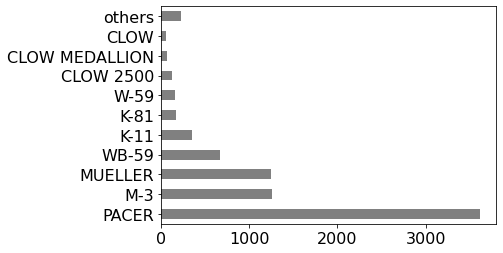

In [57]:
top10.plot.barh(color="gray")

I wonder what is up with all those Pacer hydrants?  Have they always been so popular with the city?  Turns out we can find out, because we also have a column called `year_manufactured`.

Let's find all the rows for Pacer hydrants and extract the year.

In [58]:
pacer_years = df[df['Style'] == 'Pacer']['year_manufactured']
pacer_years.head()

0    1996.0
1    1995.0
2    1996.0
3    1995.0
4    1996.0
Name: year_manufactured, dtype: float64

Let's round to the decade.  We can do that by dividing by 10 (integer division), then multiplying by 10 again.

In [59]:
pacer_decades = pacer_years // 10 * 10
pacer_decades.head()

0    1990.0
1    1990.0
2    1990.0
3    1990.0
4    1990.0
Name: year_manufactured, dtype: float64

How many Pacers were there each decade?

In [60]:
pacer_decades.value_counts().astype(int)

2000.0    1730
1990.0     846
2010.0     503
1980.0      21
1960.0       1
Name: year_manufactured, dtype: int64

Let's do the same thing in one step for non-pacers.  That is, we'll identify non-pacers, extract the year, round to the decade, and then count how many entries there are per decade.

In [61]:
other_decades = (df[df['Style'] != 'Pacer']['year_manufactured'] // 10 * 10)
other_decades.value_counts()

2010.0    1196
1980.0     937
1970.0     578
1990.0     431
1950.0     371
1960.0     349
2000.0     215
1940.0      68
1930.0       9
1900.0       1
Name: year_manufactured, dtype: int64

Let's line up these two Series side-by-side in a DataFrame

In [62]:
pacer_df = DataFrame({
    "pacer":pacer_decades.dropna().astype(int).value_counts(), 
    "other":other_decades.dropna().astype(int).value_counts()
})
pacer_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


That looks plottable!

<AxesSubplot:>

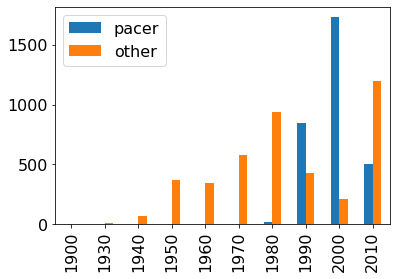

In [63]:
pacer_df.plot.bar()

That plot shows that the city started getting Pacers in the 90's.  Most were from the 2000 decade, and it seems there is finally a shift to other styles.

While this plot is fine, when multiple bars represent a breakdown of a total amount, it's more intuitive to stack the bars over each other.  This is easy with the `stacked=` argument.

Text(0, 0.5, 'Hydrant Counts')

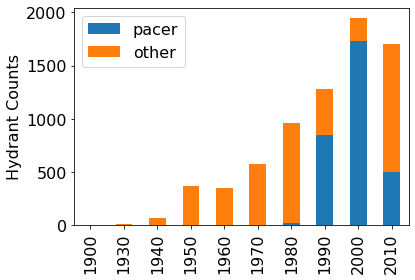

In [64]:
ax = pacer_df.plot.bar(stacked=True)
ax.set_ylabel("Hydrant Counts")

This data supports all the same conclusions as before, and now one more thing is obvious: although there was stead growth in the number of hydrants over several decades, things seem to have leveled off more recently.  Why?  Further probing of the data might provide an answer.  One explanation is that the 2000 decade contains 10 years, but we have a couple years left for the 10's.  Perhaps this decade will still catch up.

# Conclusion

After this reading, you should now be ready to create four types of plots: pie charts, scatter plots, line plots, and 
bar plots.

We saw that both line and bar plots can be created from either a single Series or a DataFrame.  When created from a single Series, we end up with either a single line (for a line plot) or one set of bars (for a bar plot).

When we create from a DataFrame, we get multiple lines (one per column) for a line plot.  And for a bar plot, we get multiple sets of bars.  We can control whether those bars are vertical (with .bar) or horizontal (with .barh), as well as whether the bars are stacked or side-by-side.